04_training_linear_models

# 线性回归

## 标准方程

成本函数最小的 sigma 值---闭式解方法

In [51]:
import numpy as np

num = 100

np.random.seed(42)
# rand()  # Random values in a given shape [0, 1)
X = 2 * np.random.rand(num, 1)
# 生成 标准正态分布 N(μ,σ2)  (平均值， 方差)
# mu + sigma * np.random.randn(...)
y = 4 + 3 * X + np.random.randn(num, 1)

In [207]:
# 均值， 方差， 标准差
np.mean(y), np.var(y), np.std(y)

(6.820004100101897, 3.4958477182304035, 1.869718620068379)

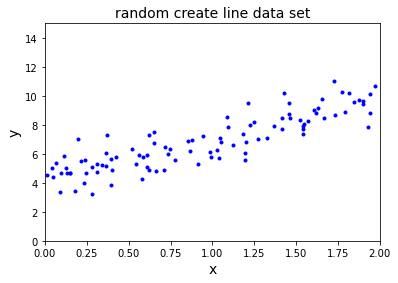

In [66]:
import matplotlib.pyplot as plt
import matplotlib

plt.plot(X, y, "b.")
# plt.scatter(X, y)
plt.title("random create line data set", fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [87]:
X_b = np.c_[np.ones((num, 1)), X]  # # add x0 = 1 to each instace
# 使用线性模块（np.linalg）中的 inv() 函数来对矩阵求逆，dot() 方法来计算矩阵的内积
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [89]:
# 计算获得的最小成本函数的 sigma 值，
# sigma0=4.21509616(截距)   sigma1=2.77011339（特征权重）
theta_best

array([[4.21509616],
       [2.77011339]])

In [91]:
# pinv() 伪逆
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

使用 sigma 做出预测

In [76]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instace
# add x0 的目的是在 矩阵相乘时，x0 所对应的是sigma0（偏置项）（截距）
X_new_b = np.c_[np.ones((2, 1)), X_new]
# X_new_b 与 theta_best 的点积
y_predict = X_new_b.dot(theta_best)
# x=0时y=4.21509616    x=2时y=4.21509616
y_predict

array([[4.21509616],
       [9.75532293]])

In [79]:
"""
[ 1 0    [4.21509616
  1 2]    2.77011339]
两个矩阵相乘 
"""
# y = mu + sigma * np.random.randn(...)
y1 = 1 * 4.21509616 + 0 * 2.77011339
y2 = 1 * 4.21509616 + 2 * 2.77011339 

y1, y2

(4.21509616, 9.75532294)

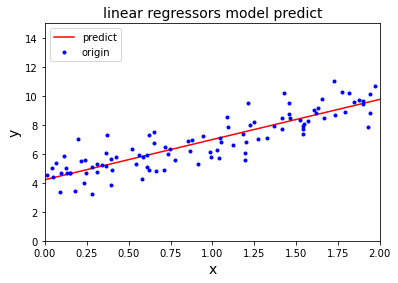

In [74]:
# 绘制模型的预测结果
plt.plot(X_new, y_predict, "r-", label="predict")
plt.plot(X, y, "b.", label="origin")
plt.axis([0, 2, 0, 15])
plt.title("linear regressors model predict", fontsize=14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(loc="upper left")

plt.show()

In [70]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [72]:
# 偏值项， 特征权重
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [73]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 计算复杂度

# 梯度下降

## 批量梯度下降

In [135]:
# 学习率
eta = 0.1
n_iterations = 1000
# 所使用的数据集中实例的数量
m = 100
# 随机初始化
theta = np.random.randn(2, 1)
# theta 

for iteration in range(n_iterations):
    # 成本函数的梯度向量
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
#     print(gradients)
    # 梯度下降步长
    theta = theta - eta * gradients

In [136]:
theta

array([[4.21509616],
       [2.77011339]])

In [168]:
def plot_gradient_descent(theta, eta):
    """绘制梯度下降使用不同的学习率"""
    plt.plot(X, y, "b.")
    
    m = len(X_b)
    n_iterations = 1000
    
    for interation in range(n_iterations):
        if interation < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if interation > 0 else "b--"
            # interation = 0时为起点
            plt.plot(X_new, y_predict, style)
        # 成本函数的梯度向量
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        # 梯度下降步长
        theta = theta - eta * gradients 
        theta_path_bgd.append(theta)
        
    plt.xlabel("$x_1$", fontsize=14)
    plt.title("$\eta={}$".format(eta), fontsize=18)
    plt.axis([0, 2, 0, 15])


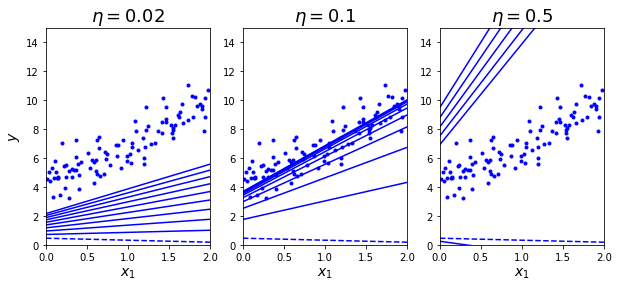

In [169]:
theta_path_bgd = []
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.ylabel("$y$", fontsize=14)
plot_gradient_descent(theta, 0.02)
plt.subplot(132)
plot_gradient_descent(theta, 0.1)
plt.subplot(133)
plot_gradient_descent(theta, 0.5)

## 随机梯度下降

In [143]:
np.random.randint(10)

2

(0.0, 2.0, 0.0, 15.0)

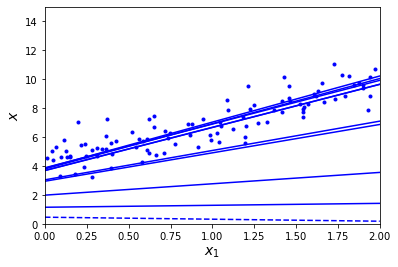

In [170]:
np.random.seed(42)
theta_path_sgd = []
# 迭代次数
n_epochs = 50
# 学习计划超参数
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "b--"
            plt.plot(X_new, y_predict, style)
        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # i 变大，t 变大， eta 变小
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
 
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x$", fontsize=14)
plt.axis([0, 2, 0, 15])

In [171]:
theta

array([[4.21076011],
       [2.74856079]])

In [172]:
from sklearn.linear_model import SGDRegressor

# Linear model fitted by minimizing a regularized empirical loss with SGD
# 最大迭代次数，，不使用正则化，学习率从0.1开始
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [167]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

## 小批量梯度下降

In [186]:
theta_path_mgd = []
np.random.seed(42)

n_iterations = 50
minibatch_size = 20
t0, t1 = 200, 1000

theta = np.random.randn(2,1)

def learning_schedule_m(t):
    return t0 / (t + t1)

t = 0 
for epoch in range(n_iterations):
    index_shuffled = np.random.permutation(m)
    X_b_shuffled = X_b[index_shuffled]
    y_shuffled = y[index_shuffled]
    
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        t += 1
        eta = learning_schedule_m(t)

        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [187]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [189]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

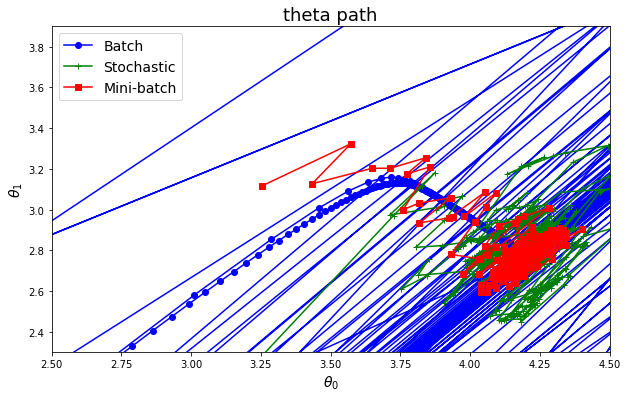

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", label="Batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "g-+", label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "r-s", label="Mini-batch")

plt.legend(loc = "upper left", fontsize=14)
plt.xlabel(r"$\theta_0$", fontsize=14)
plt.ylabel(r"$\theta_1$", fontsize=14)
plt.title("theta path", fontsize=18)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


# 多项式回归

In [225]:
# y = o.5 * x**2 + 1.0 * x + 2 + 高斯白噪声
m = 100
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 

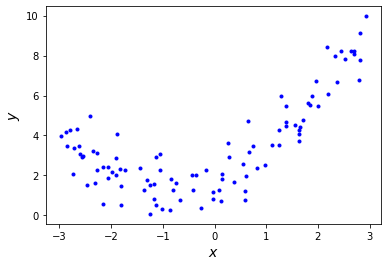

In [226]:
plt.plot(X, y, "b.")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
# plt.title("非线性带噪声数据集")
plt.show()


对训练数据进行转换

In [250]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures
poly_feattures = PolynomialFeatures(degree=2, include_bias=False)
# 包含原本的特征 X 和该特征的平方
X_poly = poly_feattures.fit_transform(X)

In [251]:
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [252]:
0.75275929 ** 2

0.566646548681304

In [253]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
# 截距，系数
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

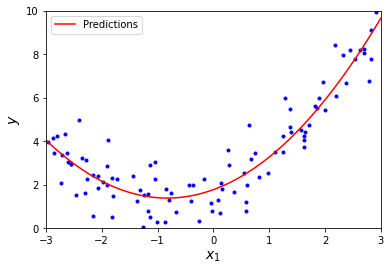

In [254]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_polt = poly_feattures.fit_transform(X_new)
y_new = lin_reg.predict(X_new_polt)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.show()

# 学习曲线

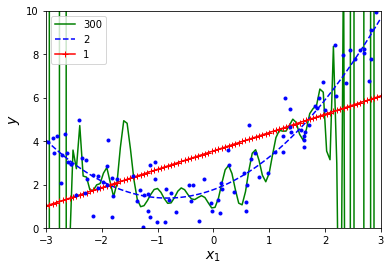

In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, degree, linewidth in (("g-", 300, 2), ("b--", 2, 3), ("r-+", 1, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    lin_reg = LinearRegression()
    std_scaler = StandardScaler()
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    
    plt.plot(X_new, y_newbig, style, label=str(degree))
    
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(loc="upper left", fontsize=10)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    """绘制学习曲线：模型在训练集和验证集上，关于‘训练集大小’的性能函数"""
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_val[:m])
         
    
    
    # Mean squared error regression loss
    
    
    


# 正则线性模型

## 岭回归

## 套索回归

## 弹性网络

## 早期停止法

## 逻辑回归

## 概率估算

## 训练和成本函数

## 决策边界

## Softmax回归

# 练习